In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_iris(return_X_y=True)

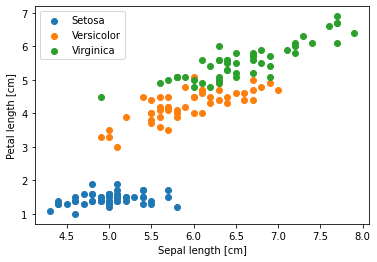

In [3]:
unique_class = np.unique(y)
class_labels = ['Setosa', 'Versicolor', 'Virginica']
for class_, label_ in zip(unique_class, class_labels):
    plt.scatter(X[:, 0][y == class_], X[:, 2][y == class_], label=label_)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend()
plt.show()

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X[:, [0, 2]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (105, 2)
X_test: (45, 2)


In [6]:
def show_classifier(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, predictions)}')
    plot_decision_regions(X_std, y, clf=model)

# KNearestNeighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.9333333333333333


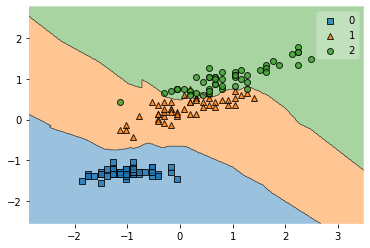

In [8]:
knn = KNeighborsClassifier()
show_classifier(knn)

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.9555555555555556


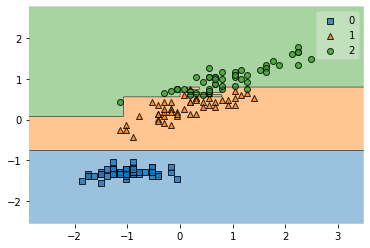

In [10]:
tree = DecisionTreeClassifier()
show_classifier(tree)

# Regresja Logistyczna

In [11]:
from sklearn.linear_model import LogisticRegression

Accuracy: 1.0


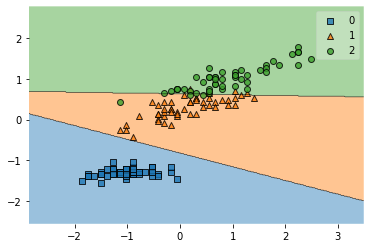

In [12]:
lr = LogisticRegression()
show_classifier(lr)

# Naiwny Klasyfikator Bayesa

In [13]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.9333333333333333


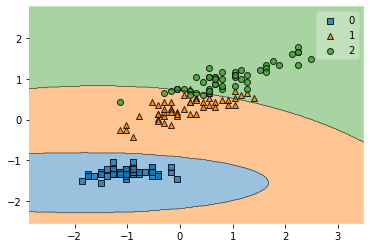

In [14]:
nb = GaussianNB()
show_classifier(nb)

# SVM

In [15]:
from sklearn.svm import SVC

Accuracy: 1.0


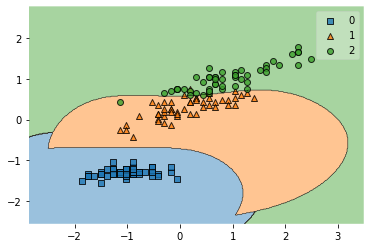

In [16]:
svm = SVC()
show_classifier(svm)

# Strojenie hiperparametrów

In [17]:
# każdy algorytm ma swoje hiperparametry, szukajcie ich np. w dokumentacji sklearn
# do strojenia hiperparametrów używamy metody grid search lub randomized search
# dla prostoty użyjemy tylko pierwszego
from sklearn.model_selection import GridSearchCV

In [18]:
# dla KNN hiperparametrem jest np. ilość sąsiadów
n_neighbors = np.arange(3, 10, 1)
# stosujemy konwencję "nazwa_parametru": wartości
grid_parameters = {
    'n_neighbors': n_neighbors
}
knn = KNeighborsClassifier()
# tworzymy siatkę z modelem oraz słownikiem parametrów
grid = GridSearchCV(knn, grid_parameters)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])})

In [19]:
# wybpisujemy najlepszy wynik
print(f'Best score: {grid.best_score_}')

Best score: 0.9523809523809523


In [20]:
# możemy wypisać też wartość parametru, dla której ten wynik uzyskaliśmy
print(f'Best parameters: {grid.best_params_}')

Best parameters: {'n_neighbors': 4}


In [21]:
# wybieramy nasz najlepszy model
best_knn = grid.best_estimator_
# musimy go wytrenować na nowo
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
# sprawdźmy, jak się będzie prezentował na danych testowych
pred = best_knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, pred)}')

Accuracy: 0.9777777777777777


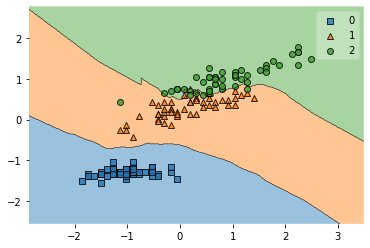

In [23]:
# uzyskaliśmy znaczną poprawę skuteczności!
plot_decision_regions(X_std, y, best_knn)
plt.show()